In [6]:
import io
import requests
import numpy as np
from pca import pca
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

In [7]:
df =pd.read_csv('clean_mutual_funds_data.csv')
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     814 non-null    int64  
 1   Scheme_Name    814 non-null    object 
 2   Min_Sip        814 non-null    int64  
 3   Min_Lumpsum    814 non-null    int64  
 4   Expense_Ratio  814 non-null    float64
 5   Fund_Size_Cr   814 non-null    float64
 6   Fund_Age_Yr    814 non-null    int64  
 7   Fund_Manager   814 non-null    object 
 8   Risk_Level     814 non-null    int64  
 9   Amc_Name       814 non-null    object 
 10  Rating         814 non-null    int64  
 11  Category       814 non-null    object 
 12  Sub_Category   814 non-null    object 
 13  Returns_1Yr    814 non-null    float64
 14  Returns_3Yr    814 non-null    float64
 15  Returns_5Yr    814 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 101.9+ KB


,Unnamed: 0,Scheme_Name,Min_Sip,Min_Lumpsum,Expense_Ratio,Fund_Size_Cr,Fund_Age_Yr,Fund_Manager,Risk_Level,Amc_Name,Rating,Category,Sub_Category,Returns_1Yr,Returns_3Yr,Returns_5Yr
0,0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,0.0
4,4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,5,Aditya Birla SL Banking&Financial Services-Dir...,1000,1000,1.17,2384.0,9,Dhaval Gala,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,5.3,24.6,9.2
6,6,Aditya Birla SL Banking&PSU Debt Fund,1000,1000,0.37,7994.0,10,Kaustubh Gupta,3,Aditya Birla Sun Life Mutual Fund,4,Debt,Banking and PSU Mutual Funds,4.5,6.8,7.3
7,7,Aditya Birla SL CEF – Global Agri Plan-Direct ...,1000,1000,1.29,15.0,10,Vinod Narayan Bhat,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,-10.3,29.4,9.3
8,8,Aditya Birla SL Corporate Bond Fund,100,100,0.31,12120.0,10,Kaustubh Gupta,2,Aditya Birla Sun Life Mutual Fund,4,Debt,Corporate Bond Mutual Funds,4.9,7.1,7.4
9,9,Aditya Birla SL Credit Risk Fund,100,100,0.69,1032.0,8,Sunaina da Cunha,4,Aditya Birla Sun Life Mutual Fund,4,Debt,Credit Risk Funds,8.7,9.0,7.2


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     814 non-null    int64  
 1   Scheme_Name    814 non-null    object 
 2   Min_Sip        814 non-null    int64  
 3   Min_Lumpsum    814 non-null    int64  
 4   Expense_Ratio  814 non-null    float64
 5   Fund_Size_Cr   814 non-null    float64
 6   Fund_Age_Yr    814 non-null    int64  
 7   Fund_Manager   814 non-null    object 
 8   Risk_Level     814 non-null    int64  
 9   Amc_Name       814 non-null    object 
 10  Rating         814 non-null    int64  
 11  Category       814 non-null    object 
 12  Sub_Category   814 non-null    object 
 13  Returns_1Yr    814 non-null    float64
 14  Returns_3Yr    814 non-null    float64
 15  Returns_5Yr    814 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 101.9+ KB


,Unnamed: 0,Min_Sip,Min_Lumpsum,Expense_Ratio,Fund_Size_Cr,Fund_Age_Yr,Risk_Level,Rating,Returns_1Yr,Returns_3Yr,Returns_5Yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,406.500000,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.047420,7.543612
std,235.125853,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.307073,5.066243
min,0.000000,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,0.000000,-4.100000
25%,203.250000,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.000000,5.100000
50%,406.500000,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,17.950000,7.500000
75%,609.750000,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.000000,11.500000
max,813.000000,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


# Standardize the data

In [6]:
# Target Variable
Y =df['Risk_Level']
target = df['Risk_Level'].to_numpy()
# target

In [6]:
X = df.loc[:,~df.columns.isin(['Unnamed', 'Scheme_Name', 'Fund_Manager','Risk_Level', 'Amc_Name', 'Category', 'Sub_Category']) ]
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,814.0,406.500000,235.125853,0.00,203.25,406.500,609.75,813.00
Min_Sip,814.0,528.500000,369.184517,0.00,150.00,500.000,1000.00,2000.00
Min_Lumpsum,814.0,3047.468059,2514.619513,0.00,500.00,5000.000,5000.00,25000.00
Expense_Ratio,814.0,0.713231,0.482161,0.00,0.31,0.615,1.03,2.59
Fund_Size_Cr,814.0,3812.854214,7181.479475,2.38,175.25,940.500,3819.00,57052.00
Fund_Age_Yr,814.0,8.319410,2.640622,1.00,6.00,10.000,10.00,17.00
Rating,814.0,2.641278,1.463476,0.00,2.00,3.000,4.00,5.00
Returns_1Yr,814.0,3.921376,6.675502,-19.70,1.50,4.400,5.60,130.80
Returns_3Yr,814.0,18.047420,12.307073,0.00,6.00,17.950,27.00,71.40
Returns_5Yr,814.0,7.543612,5.066243,-4.10,5.10,7.500,11.50,23.20


In [7]:
# Standardization of Data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)



# Applying the Normal Distribution to the data

Skewness: 8.392634751051842
Kurtosis: 159.82235875694786


/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


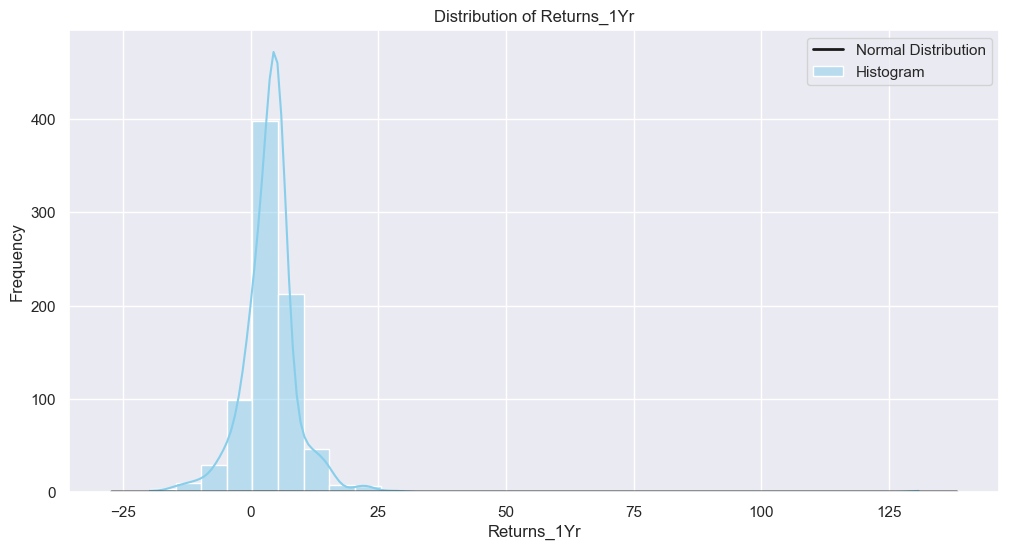

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv("your_dataset.csv")

# Select a numerical column for distribution analysis
selected_column = 'Returns_1Yr'#df['returns_1yr']

# Plot histogram and fitted distributions
plt.figure(figsize=(12, 6))

# Plot histogram
sns.histplot(df[selected_column], kde=True, color='skyblue', bins=30, label='Histogram')

# Fit and plot normal distribution
mu, std = norm.fit(df[selected_column])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add labels and legend
plt.title(f'Distribution of {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.legend()

# Display skewness and kurtosis
skewness = skew(df[selected_column])
kurt = kurtosis(df[selected_column])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

plt.show()


# Applyin of Kaplen Meier Esimate

In [6]:
# !pip install lifelines
from lifelines import KaplanMeierFitter

In [7]:
# Let's assume an arbitrary cutoff age for the event (e.g., 10 years)
cutoff_age = 10

# Create a hypothetical event column based on the cutoff age
df['Event'] = df['Fund_Age_Yr'] < cutoff_age

          KM_estimate
timeline             
0.0          1.000000
1.0          0.998771
2.0          0.975430
3.0          0.942260
4.0          0.830467
5.0          0.766585
6.0          0.744472
7.0          0.721130
8.0          0.678133
9.0          0.631450
10.0         0.631450
11.0         0.631450
12.0         0.631450
14.0         0.631450
17.0         0.631450


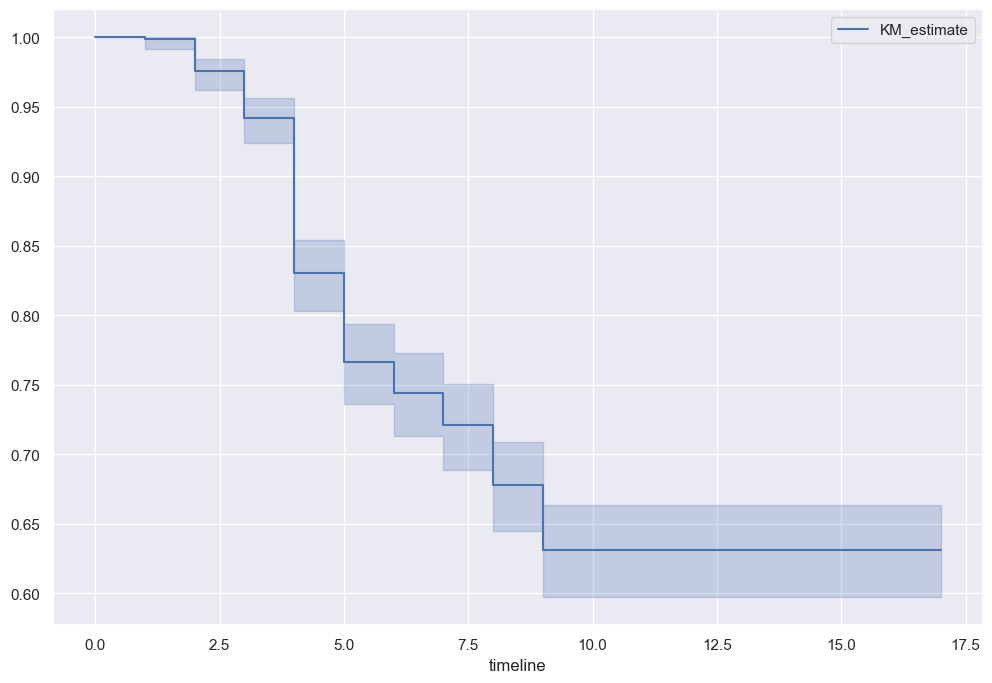

In [8]:
# Convert 'Event' column to boolean
# df['Event'] = df['Event'].astype(bool)
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator
kmf.fit(df['Fund_Age_Yr'], event_observed=df['Event'])

# Plot the Kaplan-Meier survival curve
kmf.plot()

# Optionally, you can also print out survival probabilities at specific time points
print(kmf.survival_function_)

In [12]:
#View cumulative density as a Pandas dataframe
kmf.cumulative_density_.head()

,KM_estimate
timeline,
0.0,0.000000
1.0,0.001229
2.0,0.024570
3.0,0.057740
4.0,0.169533


# RISK ANALYSIS

In [11]:
df['Risk_Level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

Total no of schemes in each risk level

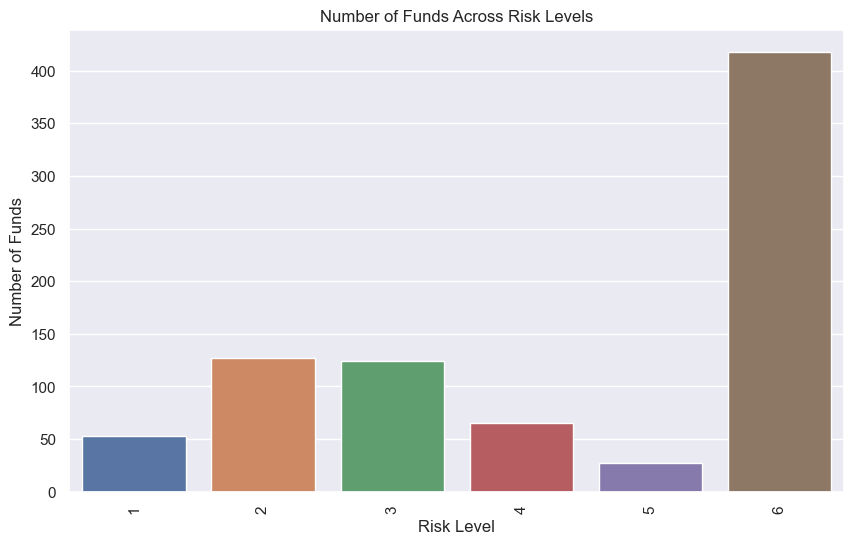

Total Number of Schemes in Each Risk Level:
Risk_Level
6    418
2    127
3    124
4     65
1     53
5     27
Name: count, dtype: int64


In [5]:

# sns.countplot(df,x='Risk_Level')
# plt.title('Number of funds across Risk level')
# plt.ylabel('Number of funds')
# plt.xticks(rotation='vertical')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for number of schemes across risk levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Risk_Level')
plt.title('Number of Funds Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Funds')
plt.xticks(rotation='vertical')
plt.show()

# Print the exact number of schemes in each risk level
print("Total Number of Schemes in Each Risk Level:")
print(df['Risk_Level'].value_counts())


Amc and Risk Level

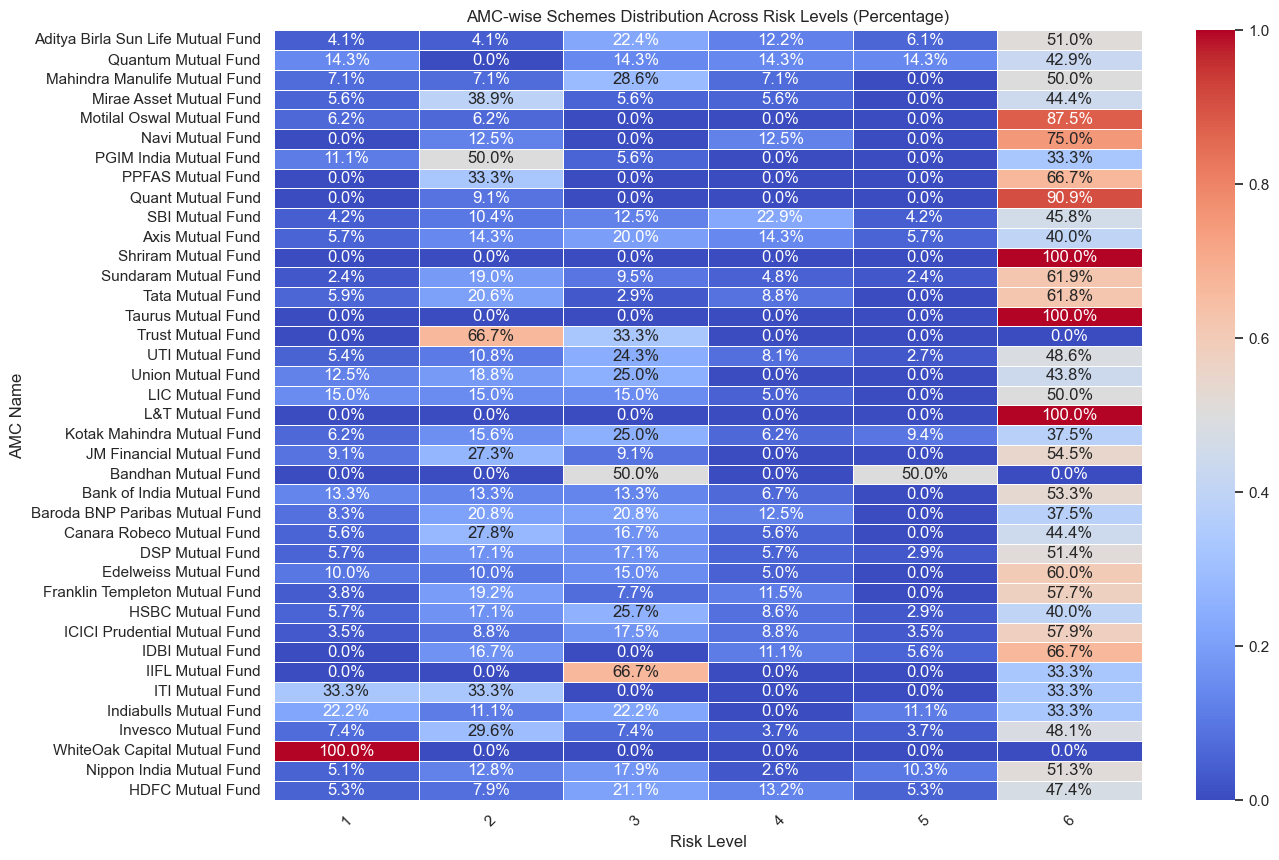

In [8]:

# plt.figure(figsize=(14,10))
# sns.heatmap(pd.crosstab(df['Amc_Name'],df['Risk_Level'],normalize='index'),annot=True,fmt='.1%')
# plt.title('AMC wise schemes distribution across risk level in percentage')
# plt.show()

# Create a crosstab of AMC and Risk Level
amc_risk_crosstab = pd.crosstab(df['Amc_Name'], df['Risk_Level'], normalize='index')

# Sort AMCs based on the total number of schemes
amc_risk_crosstab['Total'] = amc_risk_crosstab.sum(axis=1)
amc_risk_crosstab_sorted = amc_risk_crosstab.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(amc_risk_crosstab_sorted, annot=True, fmt='.1%', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('AMC-wise Schemes Distribution Across Risk Levels (Percentage)')
plt.xlabel('Risk Level')
plt.ylabel('AMC Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Category and Risk Level

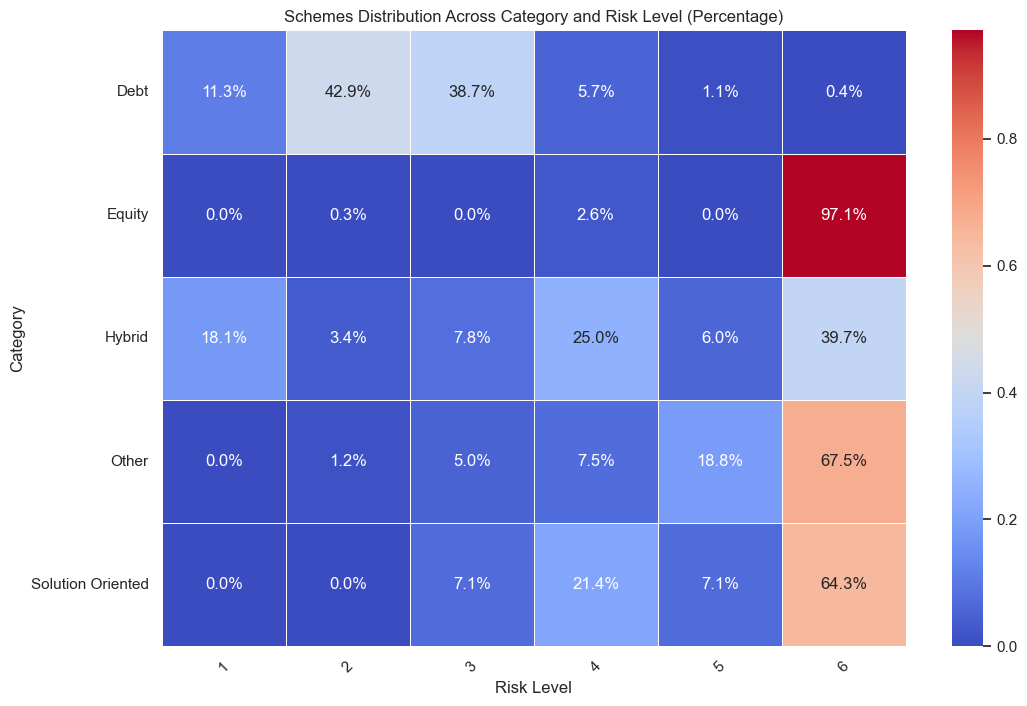

In [9]:

# sns.heatmap(pd.crosstab(df['Category'],df['Risk_Level'],normalize='index'),annot=True,fmt='.1%')
# plt.title('Schemes distribution across category and risk level')
# plt.show()

# Create a crosstab of Category and Risk Level
category_risk_crosstab = pd.crosstab(df['Category'], df['Risk_Level'], normalize='index')

# Sort categories based on the total number of schemes
category_risk_crosstab['Total'] = category_risk_crosstab.sum(axis=1)
category_risk_crosstab_sorted = category_risk_crosstab.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_risk_crosstab_sorted, annot=True, fmt='.1%', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Schemes Distribution Across Category and Risk Level (Percentage)')
plt.xlabel('Risk Level')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Rating and Risk Level

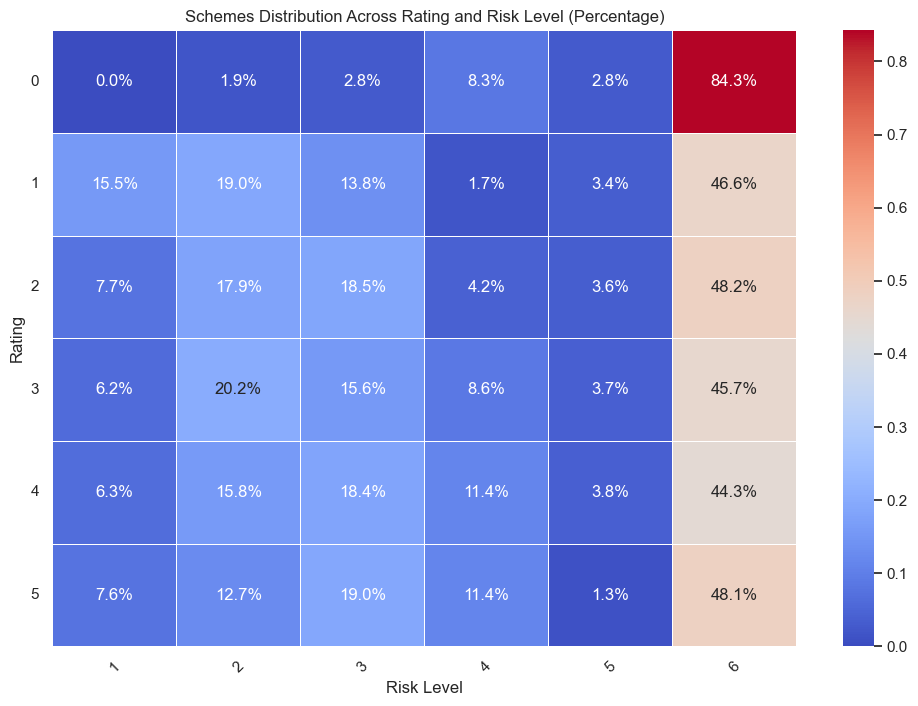

In [10]:

# sns.heatmap(pd.crosstab(df['Rating'],df['Risk_Level'],normalize='index'),annot=True,fmt='.1%')
# plt.title('Schemes distribution across rating and risk level')
# plt.show()

# Create a crosstab of Rating and Risk Level
rating_risk_crosstab = pd.crosstab(df['Rating'], df['Risk_Level'], normalize='index')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rating_risk_crosstab, annot=True, fmt='.1%', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Schemes Distribution Across Rating and Risk Level (Percentage)')
plt.xlabel('Risk Level')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


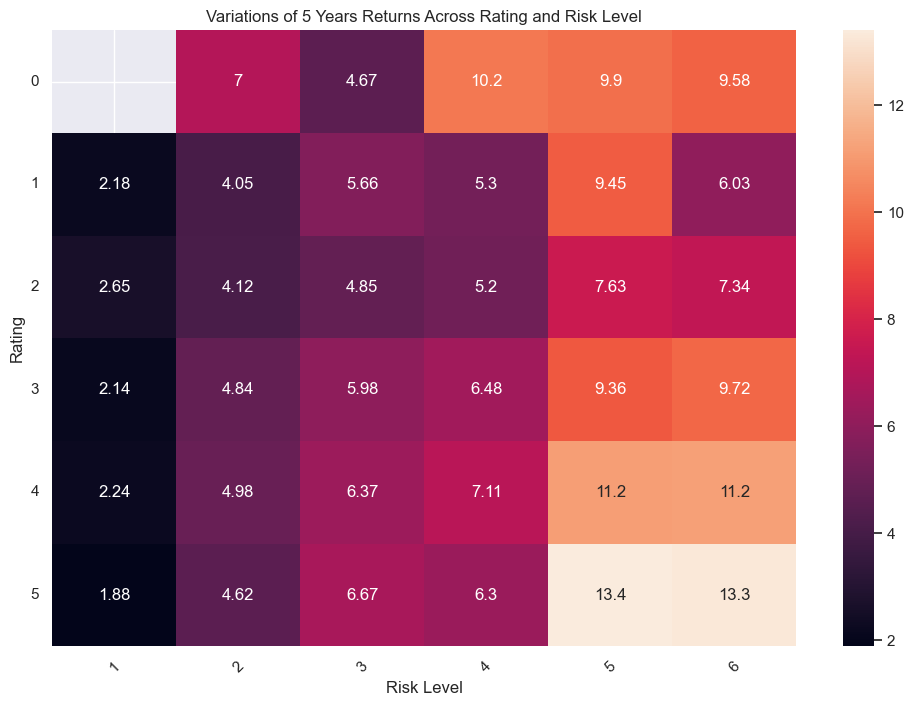

In [11]:
# sns.heatmap(pd.pivot_table(data=df,index='Rating',columns='Risk_Level',values='Returns_5Yr'),annot=True,fmt='.3g')
# plt.title('Variations of 5 years returns across rating and risk level')
# plt.show()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.pivot_table(data=df, index='Rating', columns='Risk_Level', values='Returns_5Yr'), annot=True, fmt='.3g')
plt.title('Variations of 5 Years Returns Across Rating and Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


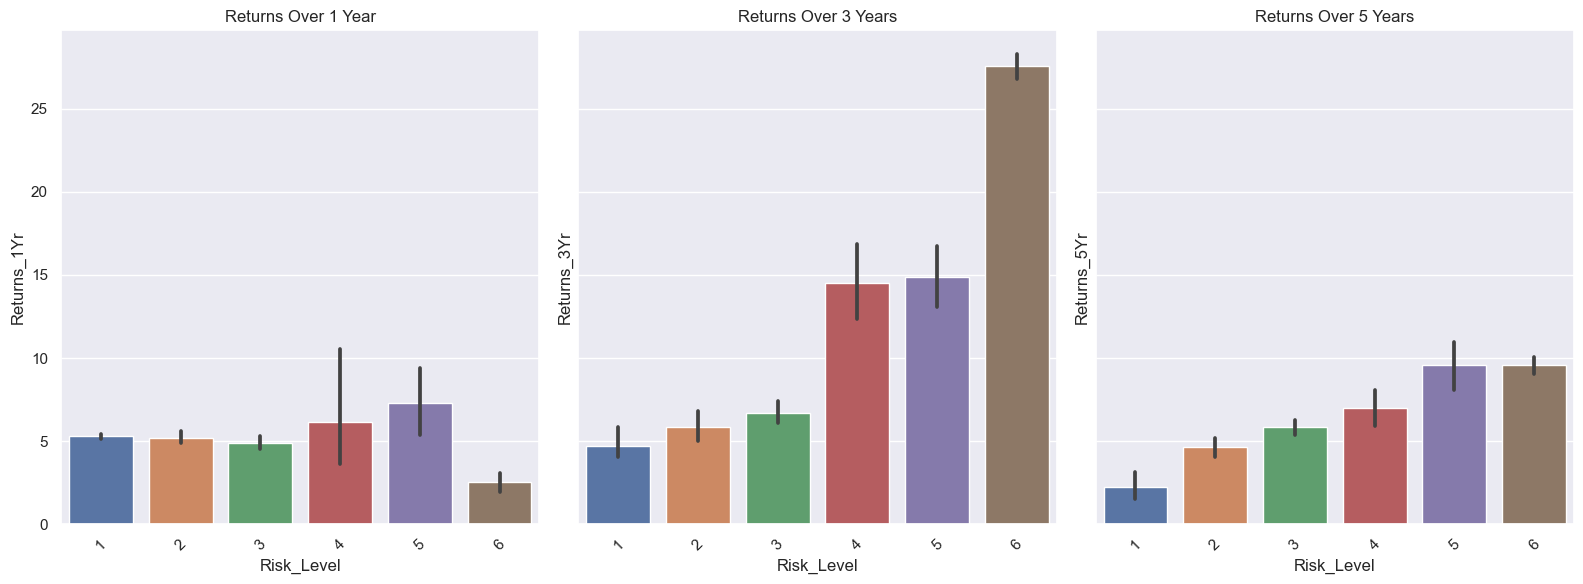

In [12]:
# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey='row')

# Create bar plots for each axis
sns.barplot(data=df, x='Risk_Level', y='Returns_1Yr', ax=axes[0])
sns.barplot(data=df, x='Risk_Level', y='Returns_3Yr', ax=axes[1])
sns.barplot(data=df, x='Risk_Level', y='Returns_5Yr', ax=axes[2])

# Set titles for each axis
axes[0].set_title('Returns Over 1 Year')
axes[1].set_title('Returns Over 3 Years')
axes[2].set_title('Returns Over 5 Years')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


# Fitted Weibull Distribution for Fund Age

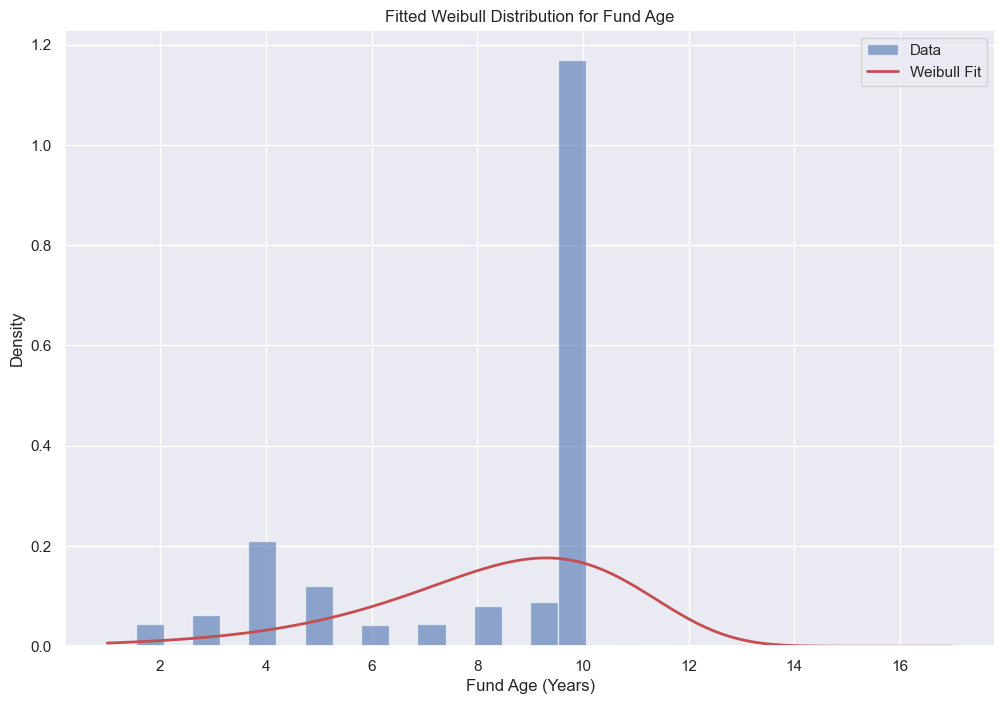

In [15]:
import scipy.stats as stats

# Extract the 'Fund_Age_Yr' column from your dataset
fund_age_years = df['Fund_Age_Yr']

# Fit Weibull distribution to the 'Fund_Age_Yr' data
shape, loc, scale = stats.weibull_min.fit(fund_age_years)

# Generate random samples from the fitted Weibull distribution
random_samples = stats.weibull_min.rvs(shape, loc=loc, scale=scale, size=len(fund_age_years))

# Visualize the fitted Weibull distribution
plt.hist(fund_age_years, bins=30, density=True, alpha=0.6, color='b', label='Data')
x = np.linspace(min(fund_age_years), max(fund_age_years), 100)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc=loc, scale=scale), 'r-', lw=2, label='Weibull Fit')
plt.xlabel('Fund Age (Years)')
plt.ylabel('Density')
plt.title('Fitted Weibull Distribution for Fund Age')
plt.legend()
plt.show()

# Analyze the Weibull distribution
# For example, calculate probabilities, percentiles, etc.


# Weibull Probability Plot for Fund Age

X-Axis (Theoretical Quantiles):
The x-axis represents the theoretical quantiles of the Weibull distribution. These quantiles are calculated based on the Weibull distribution parameters (shape, scale, and location) estimated from the dataset.
Theoretical quantiles are essentially the expected values of the dataset under the assumption that it follows a Weibull distribution. They provide a reference for comparison with the actual ordered values of the dataset.

Y-Axis (Ordered Values):
The y-axis represents the ordered values of the dataset. These values are sorted in ascending order from smallest to largest.
Each data point corresponds to the value of an observation in the dataset.

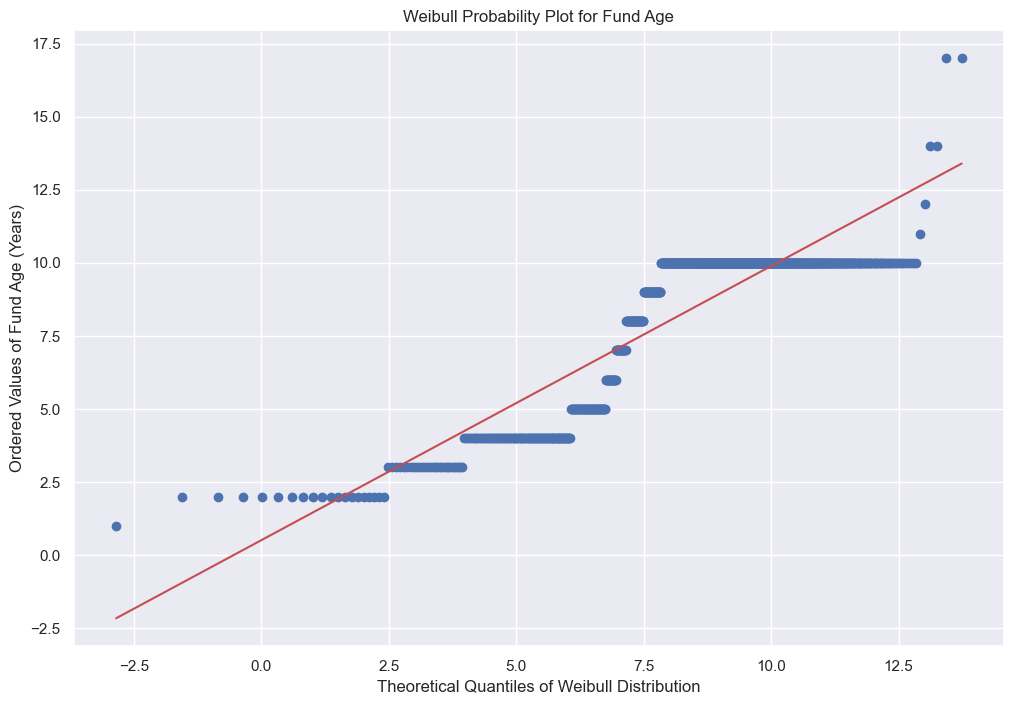

In [17]:
# import scipy.stats as stats
# import matplotlib.pyplot as plt

# # Extract the 'Fund_Age_Yr' column from your dataset
# fund_age_years = df['Fund_Age_Yr']

# # Generate Weibull probability plot
# stats.probplot(fund_age_years, dist="weibull_min", sparams=(shape, loc, scale), plot=plt)
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Ordered Values')
# plt.title('Weibull Probability Plot for Fund Age')
# plt.show()

import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract the 'Fund_Age_Yr' column from your dataset
fund_age_years = df['Fund_Age_Yr']

# Generate Weibull probability plot
stats.probplot(fund_age_years, dist="weibull_min", sparams=(shape, loc, scale), plot=plt)
plt.xlabel('Theoretical Quantiles of Weibull Distribution')
plt.ylabel('Ordered Values of Fund Age (Years)')
plt.title('Weibull Probability Plot for Fund Age')
plt.show()


# Pay Off Tables

In [9]:
import numpy as np

# Define alternatives and states of nature
alternatives = ['Equity', 'Debt', 'Hybrid','Solution Oriented','Other']
states_of_nature = ['Low Risk', 'Low to Moderate Risk', 'Moderate Risk', 'Moderately High Risk', 'High Risk', 'Very High Risk']

# Calculate average returns for each alternative over different time periods
average_returns_1yr = df.groupby('Category')['Returns_1Yr'].mean()
average_returns_3yr = df.groupby('Category')['Returns_3Yr'].mean()
average_returns_5yr = df.groupby('Category')['Returns_5Yr'].mean()
print(f"average_returns_1yr: {average_returns_1yr}")
print(f"average_returns_2yr: {average_returns_5yr}")
print(f"average_returns_3yr: {average_returns_3yr}")
# Create a payoff table to store the calculated returns for each alternative under each state of nature
payoff_table = np.zeros((len(alternatives), len(states_of_nature)))

# Fill the payoff table with calculated returns
for i, alternative in enumerate(alternatives):
    for j, state_of_nature in enumerate(states_of_nature):
        # Calculate returns based on the average returns for the corresponding risk level
        if state_of_nature == 'Low Risk':
            payoff_table[i, j] = round(average_returns_1yr[alternative],2)
        elif state_of_nature == 'Low to Moderate Risk':
            payoff_table[i, j] = round(average_returns_3yr[alternative],2)
        elif state_of_nature == 'Moderate Risk':
            payoff_table[i, j] = round(average_returns_5yr[alternative],2)
        elif state_of_nature == 'Moderately High Risk':
            payoff_table[i, j] = round(average_returns_5yr[alternative],2)
        elif state_of_nature == 'High Risk':
            payoff_table[i, j] = round(average_returns_3yr[alternative],2)
        elif state_of_nature == 'Very High Risk':
            payoff_table[i, j] = round(average_returns_1yr[alternative],2)

# Display the payoff table
print("Payoff Table:")
print("              " + "      ".join(states_of_nature))
for i, alternative in enumerate(alternatives):
    print(f"{alternative}: ", end="")
    print("  ".join("{:.2f}".format(payoff) for payoff in payoff_table[i]))


average_returns_1yr: Category
Debt                 5.547872
Equity               2.842532
Hybrid               4.075000
Other                2.891250
Solution Oriented    1.714286
Name: Returns_1Yr, dtype: float64
average_returns_2yr: Category
Debt                  4.823050
Equity               10.110390
Hybrid                7.027586
Other                 8.568750
Solution Oriented     5.917857
Name: Returns_5Yr, dtype: float64
average_returns_3yr: Category
Debt                  5.808865
Equity               29.641558
Hybrid               15.272414
Other                20.532500
Solution Oriented    18.167857
Name: Returns_3Yr, dtype: float64
Payoff Table:
              Low Risk      Low to Moderate Risk      Moderate Risk      Moderately High Risk      High Risk      Very High Risk
Equity: 2.84  29.64  10.11  10.11  29.64  2.84
Debt: 5.55  5.81  4.82  4.82  5.81  5.55
Hybrid: 4.08  15.27  7.03  7.03  15.27  4.08
Solution Oriented: 1.71  18.17  5.92  5.92  18.17  1.71
Other: 2.89  20.

In [10]:
from tabulate import tabulate

rounded_payoff_table = np.round(payoff_table, decimals=2)

# Convert the payoff table to a list of lists for tabulate
payoff_table_list = [[alternative] + list(row) for alternative, row in zip(alternatives, payoff_table)]

# Add the header row for states of nature
header = [''] + states_of_nature

# Print the formatted payoff table
print("Payoff Table:")
print(tabulate(payoff_table_list, headers=header, tablefmt="pretty"))


Payoff Table:
+-------------------+----------+----------------------+---------------+----------------------+-----------+----------------+
|                   | Low Risk | Low to Moderate Risk | Moderate Risk | Moderately High Risk | High Risk | Very High Risk |
+-------------------+----------+----------------------+---------------+----------------------+-----------+----------------+
|      Equity       |   2.84   |        29.64         |     10.11     |        10.11         |   29.64   |      2.84      |
|       Debt        |   5.55   |         5.81         |     4.82      |         4.82         |   5.81    |      5.55      |
|      Hybrid       |   4.08   |        15.27         |     7.03      |         7.03         |   15.27   |      4.08      |
| Solution Oriented |   1.71   |        18.17         |     5.92      |         5.92         |   18.17   |      1.71      |
|       Other       |   2.89   |        20.53         |     8.57      |         8.57         |   20.53   |      2.89  

In [11]:
# Calculate regrets for each alternative under each state of nature
regrets = np.zeros_like(payoff_table)
for i in range(len(alternatives)):
    max_payoff = np.max(payoff_table[i])
    regrets[i] = max_payoff - payoff_table[i]

# Print decision outcomes for each approach
print("Decision Making without Probabilities:")
print("-------------------------------------------------")
print("Optimistic Approach:")
for i, alternative in enumerate(alternatives):
    print(f"Choose {alternative} with payoff {np.max(payoff_table[i])}")
print("-------------------------------------------------")
print("Conservative Approach:")
for i, alternative in enumerate(alternatives):
    print(f"Choose {alternative} with payoff {np.min(payoff_table[i])}")
print("-------------------------------------------------")
print("Minimax Regret Approach:")
for i, alternative in enumerate(alternatives):
    max_regret_index = np.argmax(regrets[i])
    max_regret_value = regrets[i, max_regret_index]
    print(f"Choose {alternative} with maximum regret {max_regret_value} under state of nature {states_of_nature[max_regret_index]}")


Decision Making without Probabilities:
-------------------------------------------------
Optimistic Approach:
Choose Equity with payoff 29.64
Choose Debt with payoff 5.81
Choose Hybrid with payoff 15.27
Choose Solution Oriented with payoff 18.17
Choose Other with payoff 20.53
-------------------------------------------------
Conservative Approach:
Choose Equity with payoff 2.84
Choose Debt with payoff 4.82
Choose Hybrid with payoff 4.08
Choose Solution Oriented with payoff 1.71
Choose Other with payoff 2.89
-------------------------------------------------
Minimax Regret Approach:
Choose Equity with maximum regret 26.8 under state of nature Low Risk
Choose Debt with maximum regret 0.9899999999999993 under state of nature Moderate Risk
Choose Hybrid with maximum regret 11.19 under state of nature Low Risk
Choose Solution Oriented with maximum regret 16.46 under state of nature Low Risk
Choose Other with maximum regret 17.64 under state of nature Low Risk


# DECISON TREES

In [12]:
import numpy as np

# Define probabilities for each state of nature (risk level)
probabilities = {
    'Low Risk': 0.2,
    'Low to Moderate Risk': 0.15,
    'Moderate Risk': 0.25,
    'Moderately High Risk': 0.15,
    'High Risk': 0.1,
    'Very High Risk': 0.05
}

# Calculate Expected Values (EV) for each alternative
expected_values = np.zeros(len(alternatives))

for i, alternative in enumerate(alternatives):
    for j, state_of_nature in enumerate(states_of_nature):
        payoff = payoff_table[i, j]
        probability = probabilities[state_of_nature]
        expected_values[i] += payoff * probability

# Generate Decision Tree and Recommend Decision
recommended_alternative_index = np.argmax(expected_values)
recommended_alternative = alternatives[recommended_alternative_index]

# Display the Decision Tree and Recommended Decision
print("Decision Tree:")
print("Root")
print("|")
print(f"-> {recommended_alternative} (Recommended)")

# Display Expected Values (EV) for each alternative
print("\nExpected Values (EV) for Each Alternative:")
for i, alternative in enumerate(alternatives):
    print(f"{alternative}: {expected_values[i]:.2f}")


Decision Tree:
Root
|
-> Equity (Recommended)

Expected Values (EV) for Each Alternative:
Equity: 12.16
Debt: 4.77
Hybrid: 7.65
Solution Oriented: 7.34
Other: 9.28


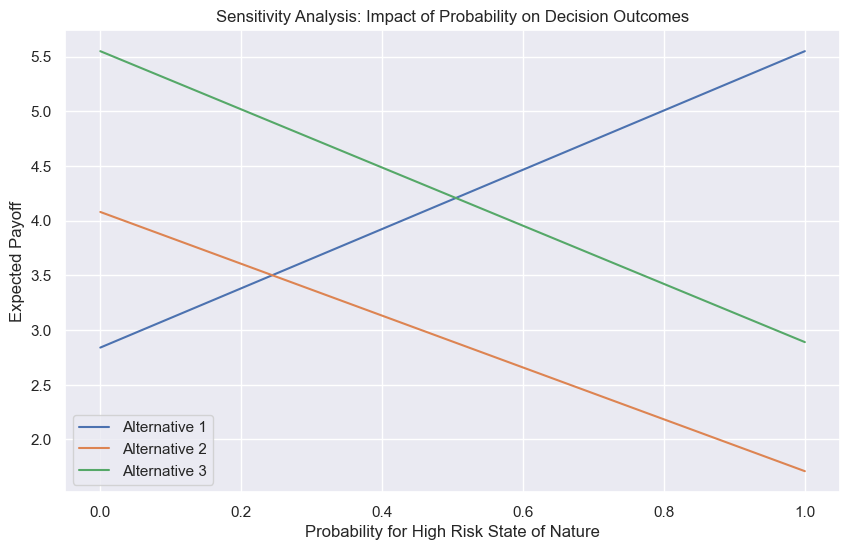

In [31]:
import matplotlib.pyplot as plt

# Define a range of probabilities for the states of nature (e.g., Low Risk and High Risk)
probabilities_range = np.linspace(0, 1, num=50)  # Varying from 0 to 1

# Initialize lists to store decision outcomes for each alternative
alternative_1_outcomes = []
alternative_2_outcomes = []
alternative_3_outcomes = []

# Iterate over the range of probabilities
for p in probabilities_range:
    # Calculate expected payoffs for each alternative based on the varying probability
    # For simplicity, let's assume linear interpolation between the two states of nature
    
    expected_payoffs_1 = (1 - p) * payoff_table[0, 0] + p * payoff_table[1, -1]  # Combination of Equity and Debt
    expected_payoffs_2 = (1 - p) * payoff_table[2, 0] + p * payoff_table[3, -1]  # Combination of Hybrid and Solution Oriented
    expected_payoffs_3 = (1 - p) * payoff_table[1, 0] + p * payoff_table[4, -1]  # Combination of Debt and Other
    
    # Append the expected payoffs to the respective lists
    alternative_1_outcomes.append(expected_payoffs_1)
    alternative_2_outcomes.append(expected_payoffs_2)
    alternative_3_outcomes.append(expected_payoffs_3)

# Plot the sensitivity analysis results
plt.figure(figsize=(10, 6))
plt.plot(probabilities_range, alternative_1_outcomes, label='Alternative 1')
plt.plot(probabilities_range, alternative_2_outcomes, label='Alternative 2')
plt.plot(probabilities_range, alternative_3_outcomes, label='Alternative 3')
plt.xlabel('Probability for High Risk State of Nature')
plt.ylabel('Expected Payoff')
plt.title('Sensitivity Analysis: Impact of Probability on Decision Outcomes')
plt.legend()
plt.grid(True)
plt.show()


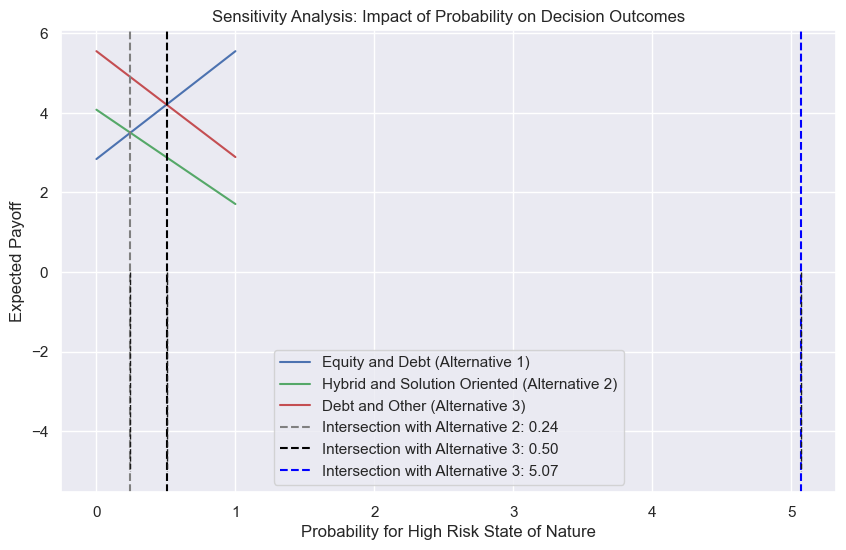

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the functions representing the expected payoffs for each alternative
def alternative_1(p):
    return (1 - p) * payoff_table[0, 0] + p * payoff_table[1, -1]

def alternative_2(p):
    return (1 - p) * payoff_table[2, 0] + p * payoff_table[3, -1]

def alternative_3(p):
    return (1 - p) * payoff_table[1, 0] + p * payoff_table[4, -1]

# Define a function to find the intersection points
def find_intersection(func1, func2):
    return fsolve(lambda p: func1(p) - func2(p), 0.5)

# Calculate intersection points for Alternative 1 and Alternative 2
intersection_1_2 = find_intersection(alternative_1, alternative_2)

# Calculate intersection points for Alternative 1 and Alternative 3
intersection_1_3 = find_intersection(alternative_1, alternative_3)

# Calculate intersection points for Alternative 2 and Alternative 3
intersection_2_3 = find_intersection(alternative_2, alternative_3)

# Plot the sensitivity analysis results with appropriate labels
plt.figure(figsize=(10, 6))
plt.plot(probabilities_range, alternative_1_outcomes, label='Equity and Debt (Alternative 1)', color='b')
plt.plot(probabilities_range, alternative_2_outcomes, label='Hybrid and Solution Oriented (Alternative 2)', color='g')
plt.plot(probabilities_range, alternative_3_outcomes, label='Debt and Other (Alternative 3)', color='r')
plt.xlabel('Probability for High Risk State of Nature')
plt.ylabel('Expected Payoff')
plt.title('Sensitivity Analysis: Impact of Probability on Decision Outcomes')
plt.legend()

# Plot vertical lines at the intersection points on the x-axis
plt.axvline(x=intersection_1_2, linestyle='--', color='gray', label=f'Intersection with Alternative 2: {intersection_1_2[0]:.2f}')
plt.axvline(x=intersection_1_3, linestyle='--', color='black', label=f'Intersection with Alternative 3: {intersection_1_3[0]:.2f}')
plt.axvline(x=intersection_2_3, linestyle='--', color='blue', label=f'Intersection with Alternative 3: {intersection_2_3[0]:.2f}')

# Plot vertical lines from the intersection points to the x-axis
for intersection in [intersection_1_2, intersection_1_3, intersection_2_3]:
    plt.plot([intersection, intersection], [0, -5], color='k', linestyle='--', lw=1)

plt.legend()
plt.grid(True)
plt.show()


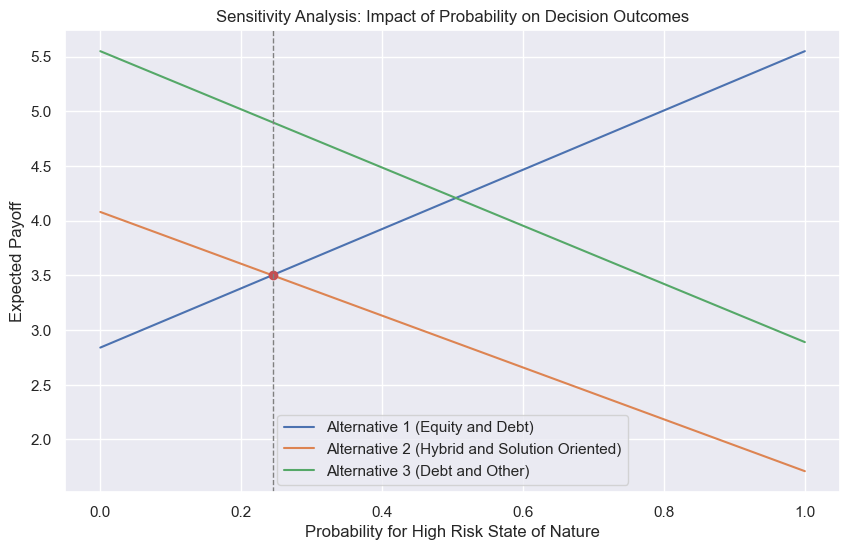

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of probabilities for the states of nature (e.g., Low Risk and High Risk)
probabilities_range = np.linspace(0, 1, num=50)  # Varying from 0 to 1

# Initialize lists to store decision outcomes for each alternative
alternative_1_outcomes = []
alternative_2_outcomes = []
alternative_3_outcomes = []

# Iterate over the range of probabilities
for p in probabilities_range:
    # Calculate expected payoffs for each alternative based on the varying probability
    # Choose different combinations of alternatives from the payoff table
    expected_payoffs_1 = (1 - p) * payoff_table[0, 0] + p * payoff_table[1, -1]  # Combination of Equity and Debt
    expected_payoffs_2 = (1 - p) * payoff_table[2, 0] + p * payoff_table[3, -1]  # Combination of Hybrid and Solution Oriented
    expected_payoffs_3 = (1 - p) * payoff_table[1, 0] + p * payoff_table[4, -1]  # Combination of Debt and Other
    
    # Append the expected payoffs to the respective lists
    alternative_1_outcomes.append(expected_payoffs_1)
    alternative_2_outcomes.append(expected_payoffs_2)
    alternative_3_outcomes.append(expected_payoffs_3)

# Find the intersection points of the three lines
intersection_points = np.argwhere(np.diff(np.sign(np.array(alternative_1_outcomes) - np.array(alternative_2_outcomes))))[:, 0] + 1

# Plot the sensitivity analysis results
plt.figure(figsize=(10, 6))
plt.plot(probabilities_range, alternative_1_outcomes, label='Alternative 1 (Equity and Debt)')
plt.plot(probabilities_range, alternative_2_outcomes, label='Alternative 2 (Hybrid and Solution Oriented)')
plt.plot(probabilities_range, alternative_3_outcomes, label='Alternative 3 (Debt and Other)')
plt.xlabel('Probability for High Risk State of Nature')
plt.ylabel('Expected Payoff')
plt.title('Sensitivity Analysis: Impact of Probability on Decision Outcomes')

# Mark intersection points on the graph
for point in intersection_points:
    plt.plot(probabilities_range[point], alternative_1_outcomes[point], 'ro')  # Mark with red circle

# Shade probability ranges between intersections
for i in range(len(intersection_points) - 1):
    plt.fill_between(probabilities_range[intersection_points[i]:intersection_points[i+1]],
                     alternative_1_outcomes[intersection_points[i]:intersection_points[i+1]],
                     alpha=0.2)  # Shade with alpha (transparency)

plt.legend()
plt.grid(True)

# Draw vertical lines from intersection points to x-axis
for point in intersection_points:
    plt.axvline(x=probabilities_range[point], color='gray', linestyle='--', linewidth=1)

plt.show()


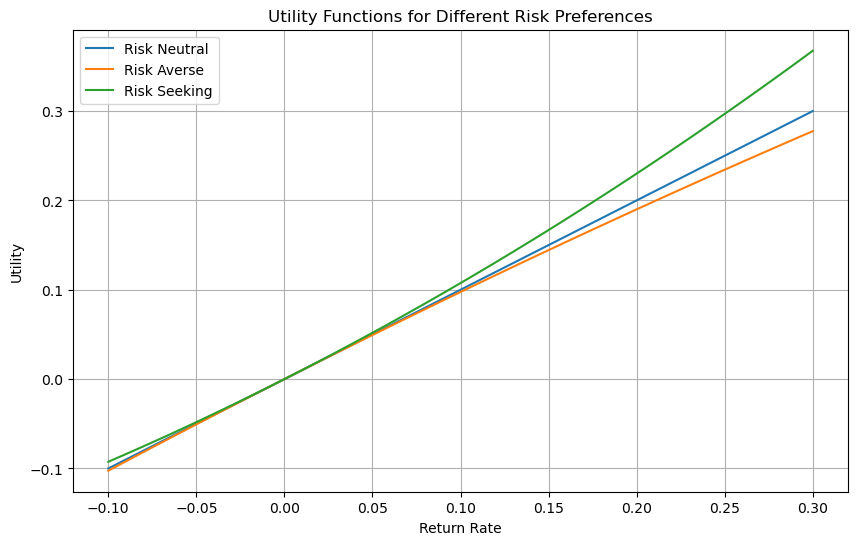

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of returns (e.g., from -10% to +30%)
returns = np.linspace(-0.1, 0.3, 100)

# Utility function parameters (you can adjust these according to your preferences)
risk_aversion = 0.5  # Adjust the risk aversion parameter for risk-averse investors
risk_preference = 1.5  # Adjust the risk preference parameter for risk-seeking investors

# Define utility functions
def risk_neutral_utility(return_rate):
    # Risk-neutral utility function (linear)
    return return_rate

def risk_averse_utility(return_rate):
    # Risk-averse utility function (concave)
    return return_rate - 0.5 * risk_aversion * (return_rate ** 2)

def risk_seeking_utility(return_rate):
    # Risk-seeking utility function (convex)
    return return_rate + 0.5 * risk_preference * (return_rate ** 2)

# Calculate utility values for each return rate
utility_risk_neutral = risk_neutral_utility(returns)
utility_risk_averse = risk_averse_utility(returns)
utility_risk_seeking = risk_seeking_utility(returns)

# Plot utility functions
plt.figure(figsize=(10, 6))
plt.plot(returns, utility_risk_neutral, label='Risk Neutral')
plt.plot(returns, utility_risk_averse, label='Risk Averse')
plt.plot(returns, utility_risk_seeking, label='Risk Seeking')
plt.xlabel('Return Rate')
plt.ylabel('Utility')
plt.title('Utility Functions for Different Risk Preferences')
plt.legend()
plt.grid(True)
plt.show()


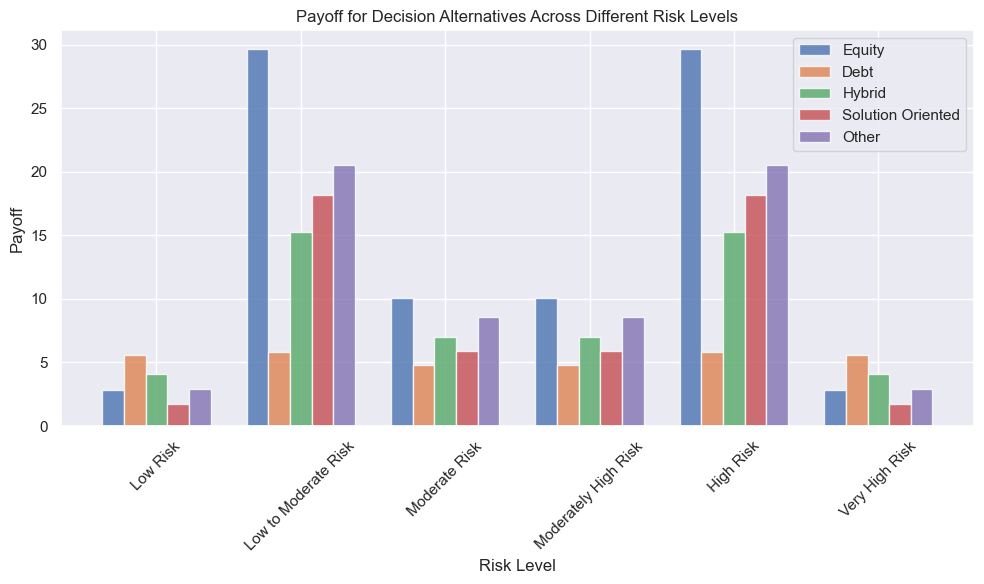

In [27]:
import matplotlib.pyplot as plt

# Data
decision_alternatives = ['Equity', 'Debt', 'Hybrid', 'Solution Oriented', 'Other']
risks = ['Low Risk', 'Low to Moderate Risk', 'Moderate Risk', 'Moderately High Risk', 'High Risk', 'Very High Risk']
payoffs = [
    [2.84, 29.64, 10.11, 10.11, 29.64, 2.84],
    [5.55, 5.81, 4.82, 4.82, 5.81, 5.55],
    [4.08, 15.27, 7.03, 7.03, 15.27, 4.08],
    [1.71, 18.17, 5.92, 5.92, 18.17, 1.71],
    [2.89, 20.53, 8.57, 8.57, 20.53, 2.89]
]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
opacity = 0.8
index = range(len(risks))

for i, payoff in enumerate(payoffs):
    plt.bar([x + i * bar_width for x in index], payoff, bar_width, alpha=opacity, label=decision_alternatives[i])

plt.xlabel('Risk Level')
plt.ylabel('Payoff')
plt.title('Payoff for Decision Alternatives Across Different Risk Levels')
plt.xticks([x + 2 * bar_width for x in index], risks, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

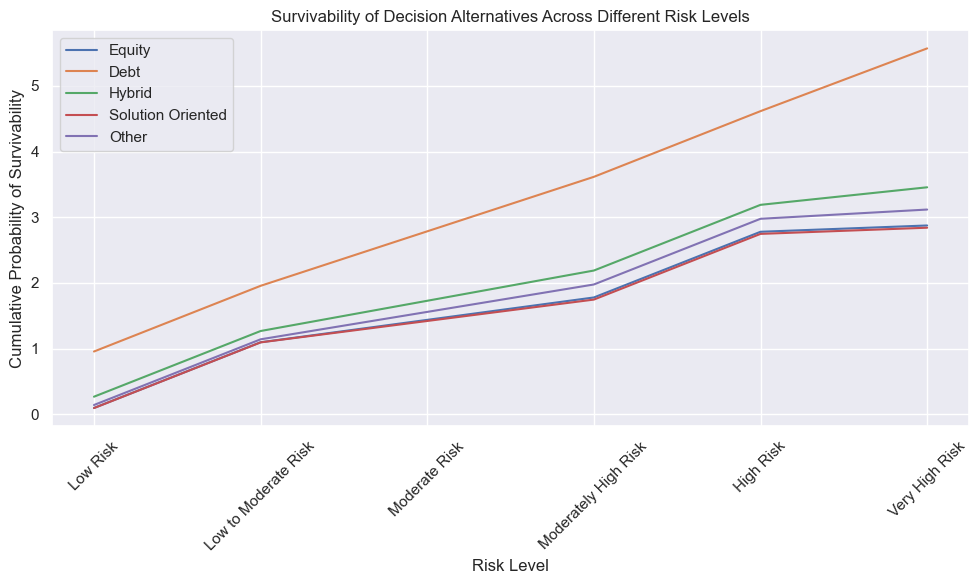

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data
decision_alternatives = ['Equity', 'Debt', 'Hybrid', 'Solution Oriented', 'Other']
risks = ['Low Risk', 'Low to Moderate Risk', 'Moderate Risk', 'Moderately High Risk', 'High Risk', 'Very High Risk']
payoffs = np.array([
    [2.84, 29.64, 10.11, 10.11, 29.64, 2.84],
    [5.55, 5.81, 4.82, 4.82, 5.81, 5.55],
    [4.08, 15.27, 7.03, 7.03, 15.27, 4.08],
    [1.71, 18.17, 5.92, 5.92, 18.17, 1.71],
    [2.89, 20.53, 8.57, 8.57, 20.53, 2.89]
])

# Normalize payoffs
normalized_payoffs = payoffs / np.max(payoffs, axis=1)[:, np.newaxis]

# Calculate cumulative probability
cumulative_probabilities = np.cumsum(normalized_payoffs, axis=1)

# Plot the Survivability Graph
plt.figure(figsize=(10, 6))
for i, decision in enumerate(decision_alternatives):
    plt.plot(risks, cumulative_probabilities[i], label=decision)

plt.xlabel('Risk Level')
plt.ylabel('Cumulative Probability of Survivability')
plt.title('Survivability of Decision Alternatives Across Different Risk Levels')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()